In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def moment(n):
    def moment_(x):
        return np.sum(np.power(x, n))
    moment_.__name__ = 'm%s' % n
    return moment_

def log_moment(n):
    def log_moment_(x):
        return np.sum(np.power(np.log(x), n))
    log_moment_.__name__ = 'lm%s' % n
    return log_moment_

def log_min():
    def log_min_(x):
        return np.min(np.log(x))
    log_min_.__name__ = 'lmin'
    return log_min_

def log_max():
    def log_max_(x):
        return np.max(np.log(x))
    log_max_.__name__ = 'lmax'
    return log_max_

def outliers(t, name):
    def outliers_(x):
        return np.sum(x >= t)
    outliers_.__name__ = 'outliers%s' % name
    return outliers_

# Milan

In [235]:
# column_names = ["Grid", "Time", "Country", "SMSin", "SMSout", "Callin", "Callout", "Internet"]
# milan_data = pd.DataFrame(columns=column_names)
# for i in range(1, 6):
#     milan_data_day = pd.read_csv('~/Downloads/sms-call-internet-mi-2013-11-0' + str(i) + '.txt',
#                              sep='\t', header=None,
#                              names=column_names)
#     milan_data = milan_data.append(milan_data_day)
# milan_data.to_csv('~/msketch/javamsketch/src/test/resources/milan_5day.csv')

In [4]:
milan_data = pd.read_csv('~/msketch/javamsketch/src/test/resources/milan_5day.csv')

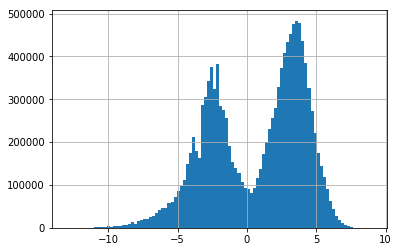

In [239]:
np.log(milan_data["Internet"]).hist(bins=100)

In [20]:
metric = "Internet"
# milan_data_mod = milan_data.set_index(pd.DatetimeIndex(milan_data['Time']))
milan_data_mod = milan_data[["Grid", "Country", "Time", metric]]
milan_data_mod = milan_data_mod[np.isfinite(milan_data_mod[metric])]
milan_data_mod["Time"] = pd.to_datetime(milan_data_mod["Time"], unit="ms")

In [122]:
%%time
milan_cube = milan_data_mod.iloc[:12000000,:]

print('Moments')
milan_cube.loc[:,'m0'] = 1
milan_cube.loc[:,'m1'] = milan_cube[metric]
milan_cube.loc[:,'m2'] = milan_cube['m1'] ** 2
milan_cube.loc[:,'m3'] = milan_cube['m1'] * milan_cube['m2']
milan_cube.loc[:,'m4'] = milan_cube['m2'] ** 2
milan_cube.loc[:,'m5'] = milan_cube['m2'] * milan_cube['m3']

print('Log moments')
milan_cube.loc[:,'lm0'] = 1
milan_cube.loc[:,'lm1'] = np.log(milan_cube[metric])
milan_cube.loc[:,'lm2'] = milan_cube['lm1'] ** 2
milan_cube.loc[:,'lm3'] = milan_cube['lm1'] * milan_cube['lm2']
milan_cube.loc[:,'lm4'] = milan_cube['lm2'] ** 2
milan_cube.loc[:,'lm5'] = milan_cube['lm2'] * milan_cube['lm3']

print('Min/max')
milan_cube.loc[:,'min'] = milan_cube['m1']
milan_cube.loc[:,'max'] = milan_cube['m1']
milan_cube.loc[:,'lmin'] = milan_cube['lm1']
milan_cube.loc[:,'lmax'] = milan_cube['lm1']

print('Group By')
milan_cube = milan_cube.groupby(["Grid", "Country"] + [pd.Grouper(key="Time", freq='6H')]).agg({
    'min': 'min',
    'max': 'max',
    'lmin': 'min',
    'lmax': 'max',
    'm0': 'sum',
    'm1': 'sum',
    'm2': 'sum',
    'm3': 'sum',
    'm4': 'sum',
    'm5': 'sum',
    'lm0': 'sum',
    'lm1': 'sum',
    'lm2': 'sum',
    'lm3': 'sum',
    'lm4': 'sum',
    'lm5': 'sum'
}).reset_index(col_level=0)
milan_cube.columns = milan_cube.columns.get_level_values(0)
print(milan_cube.head())

Moments


/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Log moments
Min/max
Group By
   Grid  Country                Time       min       max      lmin      lmax  \
0     1       32 2013-11-01 12:00:00  0.001787  0.001787 -6.327044 -6.327044   
1     1       32 2013-11-02 00:00:00  0.026137  0.026137 -3.644387 -3.644387   
2     1       32 2013-11-02 18:00:00  0.026137  0.026137 -3.644387 -3.644387   
3     1       32 2013-11-03 06:00:00  0.001787  0.001787 -6.327044 -6.327044   
4     1       32 2013-11-03 12:00:00  0.001787  0.001787 -6.327044 -6.327044   

   m0        m1        m2            m3            m4            m5  lm0  \
0   1  0.001787  0.000003  5.709522e-09  1.020469e-11  1.823894e-14    1   
1   1  0.026137  0.000683  1.785617e-05  4.667143e-07  1.219871e-08    1   
2   1  0.026137  0.000683  1.785617e-05  4.667143e-07  1.219871e-08    1   
3   1  0.001787  0.000003  5.709522e-09  1.020469e-11  1.823894e-14    1   
4   2  0.003575  0.000006  1.141904e-08  2.040937e-11  3.647788e-14    2   

         lm1        lm2         l

In [123]:
milan_cube['m0'].sum()

12000000

In [32]:
# # Old cube creation
# milan_cube = milan_data_mod.groupby(["Grid", "Country"] + [pd.Grouper(key="Time", freq='H')]).agg({metric: [
#     'min',
#     'max',
#     log_min(),
#     log_max(),
#     moment(0),
#     moment(1),
#     moment(2),
#     moment(3),
#     moment(4),
#     moment(5),
#     log_moment(0),
#     log_moment(1),
#     log_moment(2),
#     log_moment(3),
#     log_moment(4),
#     log_moment(5)
# ]}).reset_index(col_level=1)
# milan_cube.columns = milan_cube.columns.get_level_values(1)
# milan_cube

In [124]:
milan_cube.nunique()

Grid        10000
Country       133
Time           21
min        257642
max        369555
lmin       257556
lmax       369348
m0             36
m1         716164
m2         750658
m3         758154
m4         759665
m5         759261
lm0            36
lm1        756516
lm2        757599
lm3        757900
lm4        758072
lm5        758419
dtype: int64

In [125]:
milan_cube.to_csv('~/msketch/javamsketch/src/test/resources/milan_12M_6H_cubed.csv')

In [126]:
%%time
milan_grouped = milan_data_mod.iloc[:12000000,:]
milan_grouped = milan_grouped.groupby(["Grid", "Country"] + [pd.Grouper(key="Time", freq='6H')])
milan_grouped = milan_grouped[metric].apply(list).reset_index()

CPU times: user 2min 47s, sys: 37.5 s, total: 3min 24s
Wall time: 4min 43s


In [127]:
milan_grouped.count()

Grid        1548982
Country     1548982
Time        1548982
Internet    1548982
dtype: int64

In [128]:
milan_grouped.to_csv('~/msketch/javamsketch/src/test/resources/milan_grouped_12M_6H.csv')

In [53]:
# t1 = milan_data[metric].quantile(0.99)
# t5 = milan_data[metric].quantile(0.95)
# t10 = milan_data[metric].quantile(0.90)
# milan_oracle = milan_data.groupby(["Grid", "Country"]).agg({metric: [
#     'count',
#     outliers(t1, "1"),
#     outliers(t5, "5"),
#     outliers(t10, "10")
# ]}).reset_index(col_level=1)
# milan_oracle.columns = milan_oracle.columns.get_level_values(1)
# milan_oracle

In [125]:
milan_oracle.to_csv('lib/src/test/resources/milan_oracle_cubed.csv')

# Sample

In [104]:
sample = pd.read_csv('~/msketch/javamsketch/src/test/resources/sample.csv')
sample = sample.groupby(["location", "version"])
sample = sample["usage"].apply(list).reset_index()
sample.to_csv('~/msketch/javamsketch/src/test/resources/sample_grouped.csv')

In [129]:
sample = pd.read_csv('~/msketch/javamsketch/src/test/resources/sample.csv')
cutoff = sample["usage"].quantile(0.99)
sample[sample["usage"] >= 46.4].sort_values(["usage"])

,usage,latency,location,version
686,46.40,787,AUS,v3
710,46.49,976,UK,v2
563,46.54,429,AUS,v4
463,46.61,684,AUS,v4
84,46.69,209,AUS,v3
782,46.82,514,RUS,v4
23,46.88,836,AUS,v3
654,47.17,317,CAN,v2
312,47.86,680,RUS,v4
689,47.89,642,AUS,v3


In [114]:
sample = pd.read_csv('~/msketch/javamsketch/src/test/resources/sample.csv')
sample.groupby(["location", "version"]).count()

usage  latency
location version                
AUS      v3         150      150
         v4          50       50
CAN      v1          50       50
         v2         150      150
         v3          20       20
RUS      v4         200      200
UK       v2         100      100
         v3         100      100
USA      v1         200      200

# Wikipedia

In [156]:
wiki_data = pd.read_json('~/Downloads/wikipedia-2015-09-12', lines=True)

In [148]:
metric = "delta"
attributes = ["channel", "countryName", "namespace"]
wiki_data = wiki_data[attributes + [metric]]
wiki_data = wiki_data[(np.isfinite(wiki_data[metric])) & (wiki_data[metric] != 0)]
wiki_data[metric] = np.log(np.absolute(wiki_data[metric]))

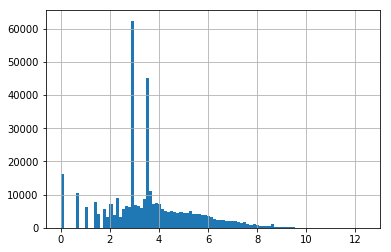

In [149]:
wiki_data["delta"].hist(bins=100)

In [151]:
wiki_cube = wiki_data.groupby(attributes).agg({metric: [
    'min',
    'max',
    moment(0),
    moment(1),
    moment(2),
    moment(3),
    moment(4),
    moment(5),
    moment(6),
    moment(7),
    moment(8)
]}).reset_index(col_level=1)
wiki_cube.columns = wiki_cube.columns.get_level_values(1)
wiki_cube

,channel,countryName,namespace,min,max,m0,m1,m2,m3,m4,m5,m6,m7,m8
0,#ar.wikipedia,Algeria,Main,0.000000,6.666957,18.0,57.644747,234.884785,1108.007978,5842.083979,3.325478e+04,1.988641e+05,1.226715e+06,7.717880e+06
1,#ar.wikipedia,Algeria,نقاش,5.267858,5.267858,1.0,5.267858,27.750330,146.184800,770.080792,4.056676e+03,2.137000e+04,1.125741e+05,5.930244e+05
2,#ar.wikipedia,Australia,Main,5.564520,5.564520,1.0,5.564520,30.963887,172.299183,958.762321,5.335052e+03,2.968701e+04,1.651940e+05,9.192252e+05
3,#ar.wikipedia,Bahrain,Main,3.784190,3.784190,1.0,3.784190,14.320091,54.189941,205.065012,7.760049e+02,2.936550e+03,1.111246e+04,4.205166e+04
4,#ar.wikipedia,Belgium,Main,5.459586,5.459586,1.0,5.459586,29.807074,162.734269,888.461660,4.850632e+03,2.648244e+04,1.445832e+05,7.893641e+05
5,#ar.wikipedia,Denmark,ويكيبيديا,6.030685,6.030685,1.0,6.030685,36.369165,219.330986,1322.716142,7.976885e+03,4.810608e+04,2.901126e+05,1.749578e+06
6,#ar.wikipedia,Egypt,Main,0.693147,8.664060,28.0,124.659483,680.894125,4142.018720,26951.803294,1.839678e+05,1.302402e+06,9.492862e+06,7.087854e+07
7,#ar.wikipedia,Hashemite Kingdom of Jordan,Main,0.693147,5.164786,8.0,19.517211,59.503557,216.944287,908.031706,4.171502e+03,2.025181e+04,1.013195e+05,5.148902e+05
8,#ar.wikipedia,Hashemite Kingdom of Jordan,نقاش المستخدم,4.127134,4.127134,1.0,4.127134,17.033238,70.298463,290.131205,1.197410e+03,4.941874e+03,2.039578e+04,8.417612e+04
9,#ar.wikipedia,Iran,Main,0.693147,0.693147,1.0,0.693147,0.480453,0.333025,0.230835,1.600027e-01,1.109054e-01,7.687378e-02,5.328484e-02


In [152]:
wiki_cube.to_csv('lib/src/test/resources/wiki_moments_cubed.csv')

In [153]:
t1 = wiki_data[metric].quantile(0.99)
t5 = wiki_data[metric].quantile(0.95)
t10 = wiki_data[metric].quantile(0.90)
wiki_oracle = wiki_data.groupby(attributes).agg({metric: [
    'count',
    outliers(t1, "1"),
    outliers(t5, "5"),
    outliers(t10, "10")
]}).reset_index(col_level=1)
wiki_oracle.columns = wiki_oracle.columns.get_level_values(1)
wiki_oracle

,channel,countryName,namespace,count,outliers1,outliers5,outliers10
0,#ar.wikipedia,Algeria,Main,18,0.0,0.0,2.0
1,#ar.wikipedia,Algeria,نقاش,1,0.0,0.0,0.0
2,#ar.wikipedia,Australia,Main,1,0.0,0.0,0.0
3,#ar.wikipedia,Bahrain,Main,1,0.0,0.0,0.0
4,#ar.wikipedia,Belgium,Main,1,0.0,0.0,0.0
5,#ar.wikipedia,Denmark,ويكيبيديا,1,0.0,0.0,1.0
6,#ar.wikipedia,Egypt,Main,28,1.0,4.0,8.0
7,#ar.wikipedia,Hashemite Kingdom of Jordan,Main,8,0.0,0.0,0.0
8,#ar.wikipedia,Hashemite Kingdom of Jordan,نقاش المستخدم,1,0.0,0.0,0.0
9,#ar.wikipedia,Iran,Main,1,0.0,0.0,0.0


In [154]:
wiki_oracle.to_csv('lib/src/test/resources/wiki_oracle_cubed.csv')

# Big Wiki

In [206]:
big_wiki_data = pd.read_csv('~/Downloads/wiki-10M.csv')

In [170]:
big_wiki_data.nunique()

comment            2672206
isNew                    2
isUnpatrolled            2
commentLength          317
deltaBucket           1765
regionName            2290
namespace             1005
isMinor                  2
channel                 53
added                27858
isRobot                  2
deleted                501
countryIsoCode         219
__time            10213634
user                531887
delta                28358
regionIsoCode         1131
count                    1
countryName            220
metroCode              209
cityName             26859
flags                   11
diffUrl           10209896
isAnonymous              2
page               5448626
dtype: int64

In [215]:
metric = "added"
attributes = ["channel", "namespace"]
big_wiki_data = big_wiki_data.set_index(pd.DatetimeIndex(big_wiki_data['__time']))
big_wiki_data = big_wiki_data[attributes + [metric]]
big_wiki_data = big_wiki_data[(np.isfinite(big_wiki_data[metric])) & (big_wiki_data[metric] > 0)]

In [216]:
big_wiki_data.head()

,channel,namespace,added
__time,,,
2018-01-08 00:00:01.258,#ru.wikipedia,MediaWiki,6.0
2018-01-08 00:00:01.460,#pl.wikipedia,Wikipedysta,1.0
2018-01-08 00:00:02.143,#en.wikipedia,Talk,23.0
2018-01-08 00:00:02.179,#en.wikipedia,Main,9.0
2018-01-08 00:00:02.253,#ceb.wikipedia,Main,8.0


In [217]:
t1 = big_wiki_data[metric].quantile(0.99)
big_wiki_oracle = big_wiki_data.groupby(attributes + [pd.TimeGrouper(freq='H')]).agg({metric: [
    'count',
    outliers(t1, "1"),
]}).reset_index(col_level=1)
big_wiki_oracle.columns = big_wiki_oracle.columns.get_level_values(1)
big_wiki_oracle

,channel,namespace,__time,count,outliers1
0,#ar.wikipedia,16,2018-01-15 05:00:00,1,0.0
1,#ar.wikipedia,Main,2018-01-08 00:00:00,149,0.0
2,#ar.wikipedia,Main,2018-01-08 01:00:00,185,0.0
3,#ar.wikipedia,Main,2018-01-08 02:00:00,105,0.0
4,#ar.wikipedia,Main,2018-01-08 03:00:00,64,0.0
5,#ar.wikipedia,Main,2018-01-08 04:00:00,79,0.0
6,#ar.wikipedia,Main,2018-01-08 05:00:00,63,0.0
7,#ar.wikipedia,Main,2018-01-08 06:00:00,122,0.0
8,#ar.wikipedia,Main,2018-01-08 07:00:00,185,0.0
9,#ar.wikipedia,Main,2018-01-08 08:00:00,166,0.0


In [221]:
big_wiki_oracle['outliers1'].sum()

74235.0

In [218]:
big_wiki_oracle.to_csv('lib/src/test/resources/big_wiki_oracle_cubed.csv')

In [219]:
big_wiki_cube = big_wiki_data.groupby(attributes + [pd.TimeGrouper(freq='H')]).agg({metric: [
    'min',
    'max',
    log_min(),
    log_max(),
    moment(0),
    moment(1),
    moment(2),
    moment(3),
    moment(4),
    moment(5),
    log_moment(0),
    log_moment(1),
    log_moment(2),
    log_moment(3),
    log_moment(4),
    log_moment(5)
]}).reset_index(col_level=1)
big_wiki_cube.columns = big_wiki_cube.columns.get_level_values(1)
big_wiki_cube

,channel,namespace,__time,min,max,lmin,lmax,m0,m1,m2,m3,m4,m5,lm0,lm1,lm2,lm3,lm4,lm5
0,#ar.wikipedia,16,2018-01-15 05:00:00,25.0,25.0,3.218876,3.218876,1.0,25.0,625.0,1.562500e+04,3.906250e+05,9.765625e+06,1.0,3.218876,10.361162,33.351293,107.353669,3.455581e+02
1,#ar.wikipedia,Main,2018-01-08 00:00:00,1.0,9008.0,0.000000,9.105868,149.0,21663.0,83984409.0,7.333297e+11,6.587312e+15,5.931574e+19,149.0,623.865921,2750.866322,12573.995231,60228.024755,3.084326e+05
2,#ar.wikipedia,Main,2018-01-08 01:00:00,2.0,2211.0,0.693147,7.701200,185.0,22428.0,17164924.0,2.951661e+10,5.669284e+13,1.124865e+17,185.0,778.450524,3439.849081,15837.660630,76250.085528,3.871860e+05
3,#ar.wikipedia,Main,2018-01-08 02:00:00,1.0,2260.0,0.000000,7.723120,105.0,11471.0,10752073.0,2.150527e+10,4.631962e+13,1.011019e+17,105.0,409.865354,1737.233189,7792.116092,37124.511576,1.893863e+05
4,#ar.wikipedia,Main,2018-01-08 03:00:00,1.0,5184.0,0.000000,8.553332,64.0,7686.0,27016542.0,1.393251e+11,7.222052e+14,3.743906e+18,64.0,222.911934,854.601760,3555.379528,16586.848939,8.970690e+04
5,#ar.wikipedia,Main,2018-01-08 04:00:00,1.0,1904.0,0.000000,7.551712,79.0,13132.0,10292000.0,1.520400e+10,2.606315e+13,4.699229e+16,79.0,339.670259,1597.102698,7916.110671,41284.402101,2.266564e+05
6,#ar.wikipedia,Main,2018-01-08 05:00:00,3.0,3720.0,1.098612,8.221479,63.0,22247.0,38118603.0,1.136075e+11,3.783324e+14,1.295618e+18,63.0,306.030236,1616.485245,9106.009984,54137.728987,3.373556e+05
7,#ar.wikipedia,Main,2018-01-08 06:00:00,1.0,2296.0,0.000000,7.738924,122.0,25771.0,19301921.0,2.632441e+10,4.700515e+13,9.415283e+16,122.0,533.746768,2632.325235,13890.844091,77252.101951,4.486258e+05
8,#ar.wikipedia,Main,2018-01-08 07:00:00,6.0,2110.0,1.791759,7.654443,185.0,35555.0,21997115.0,2.728389e+10,4.519400e+13,8.302905e+16,185.0,847.318981,4131.665057,21252.017440,114463.683242,6.416142e+05
9,#ar.wikipedia,Main,2018-01-08 08:00:00,4.0,2244.0,1.386294,7.716015,166.0,32412.0,19844876.0,2.461746e+10,4.288884e+13,8.480738e+16,166.0,755.340678,3693.919162,19119.675276,103717.481404,5.852788e+05


In [220]:
big_wiki_cube.to_csv('lib/src/test/resources/big_wiki_moments_cubed.csv')